<a href="https://colab.research.google.com/github/saazalll/House-Sales-Prediction-Model/blob/main/House_Price_Prediction_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Price Prediction

This notebook performs an analysis and builds a predictive model for house prices using the King County House Sales dataset.

The key steps covered are:

1.  **Data Loading and initial exploration**: Loading the dataset and examining the first few rows, checking for missing values, and looking at descriptive statistics.
2.  **Data Visualization**: Creating various plots (heatmap, bar plots, scatter plots) to understand the relationships between different features and the house price.
3.  **Data Cleaning**: Removing outliers based on visualizations of 'sqft\_living' and 'sqft\_above'.
4.  **Data Preprocessing**: Normalizing the numerical features to scale them between 0 and 1.
5.  **Model Training**: Splitting the data into training and testing sets and training two regression models:
    *   Gradient Boosting Regressor
    *   K-Nearest Neighbors Regressor
6.  **Model Evaluation**: Evaluating the performance of the trained models using metrics like R-squared and Mean Absolute Error.

This notebook demonstrates a typical workflow for a regression problem, from data loading and exploration to model building and evaluation.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv("/content/kc_house_data.csv")


In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.isnull()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21609,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21610,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
21611,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [10]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
df.describe(include = ['O'])

,date
count,21613
unique,372
top,20140623T000000
freq,142


<Axes: >

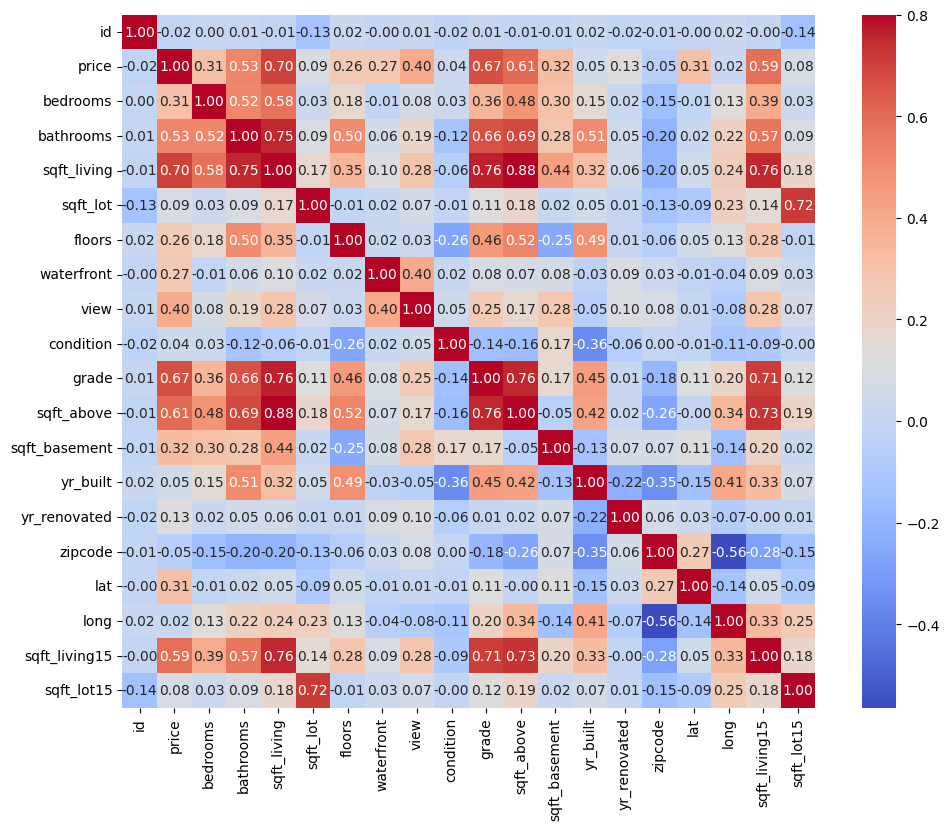

In [14]:
corrmat = df.drop('date', axis=1).corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap = "coolwarm",annot=True, fmt = ".2f")

In [15]:
df.drop(['id','date','yr_built','zipcode','long','condition'], axis=1, inplace = True )
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,0,47.5112,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1991,47.7210,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,0,47.7379,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,0,47.5208,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,0,47.6168,1800,7503


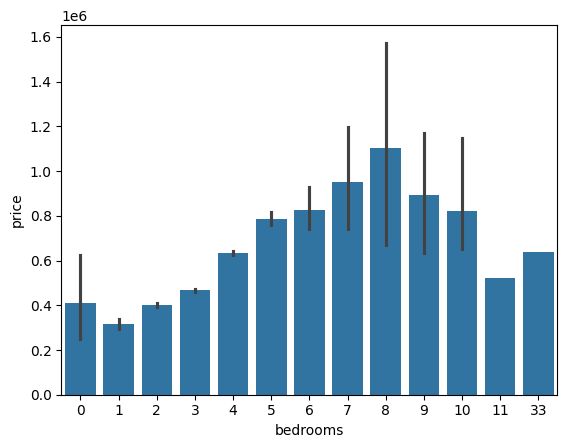

In [16]:
sns.barplot(x='bedrooms' , y='price' , data = df)
plt.show()

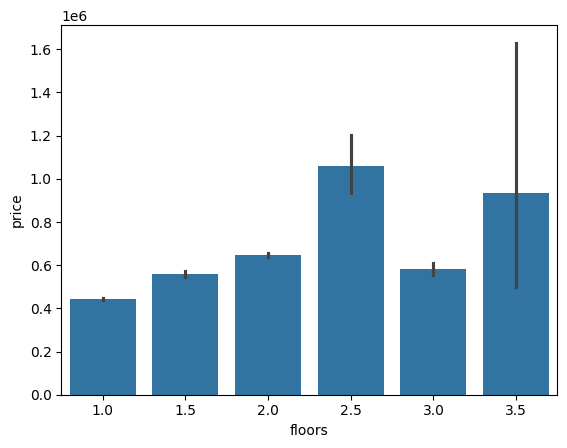

In [17]:
sns.barplot(x='floors', y='price', data = df)
plt.show()

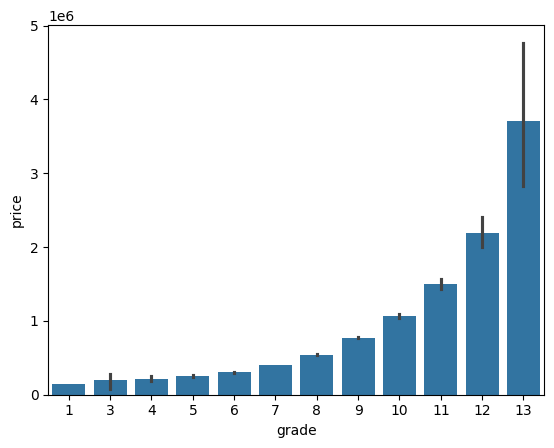

In [19]:
sns.barplot(x='grade', y='price' , data = df)
plt.show()

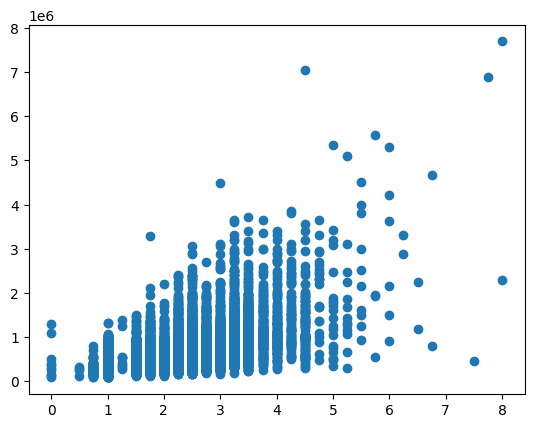

In [21]:
plt.scatter(x='bathrooms',y='price',data=df)
plt.show()

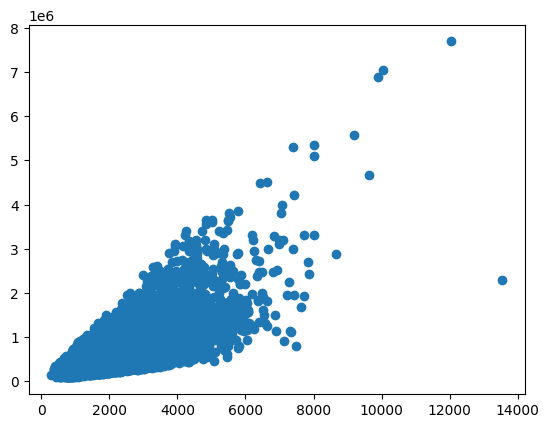

In [22]:
plt.scatter(x='sqft_living' ,y = 'price' ,data= df)

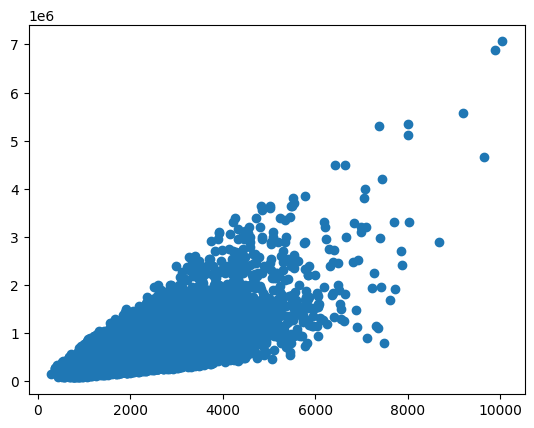

In [24]:
df = df.drop(df[(df['sqft_living']>12000) & (df['price'] >2)].index)
plt.scatter(x='sqft_living', y = 'price', data = df)

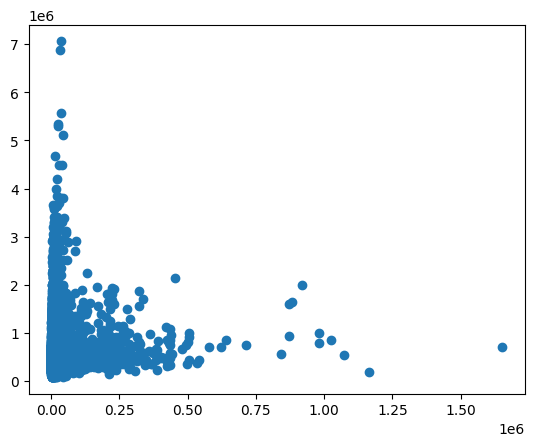

In [25]:
plt.scatter(x='sqft_lot', y='price',data = df)

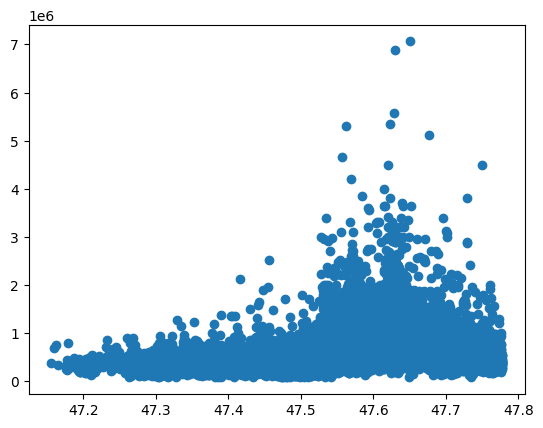

In [26]:
plt.scatter(x='lat',y='price',data=df)

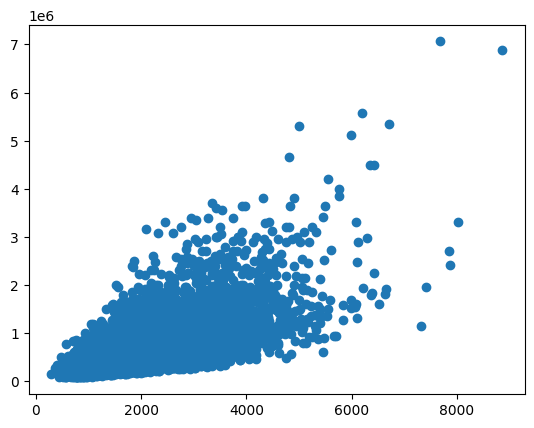

In [27]:
plt.scatter(x='sqft_above' ,y='price', data=df)

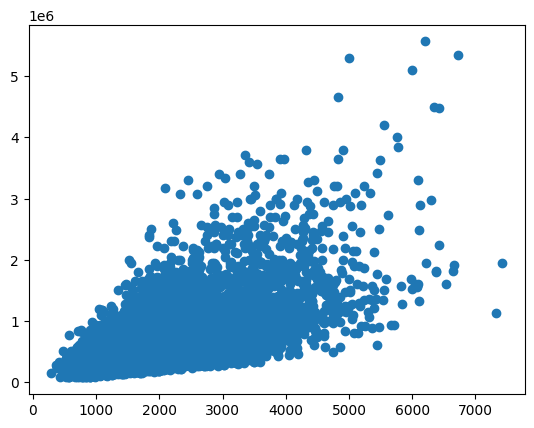

In [28]:
df = df.drop(df[(df['sqft_above'] > 7600) & (df['price'] > 1.1)] . index)
plt.scatter(x='sqft_above' , y='price' , data = df)

In [29]:
#Normalization
df['price'] = df['price'] / df['price'].max()
df['bedrooms'] = df['bedrooms'] / df['bedrooms'].max()
df['bathrooms'] = df['bathrooms'] / df['bathrooms'].max()
df['sqft_living'] = df['sqft_living'] / df['sqft_living'].max()
df['sqft_lot'] = df['sqft_lot'] / df['sqft_lot'].max()
df['floors'] = df['floors'] / df['floors'].max()
df['waterfront'] = df['waterfront'] / df['waterfront'].max()
df['view'] = df['view'] / df['view'].max()
df['grade'] = df['grade'] / df['grade'].max()
df['sqft_above'] = df['sqft_above'] / df['sqft_above'].max()
df['sqft_basement'] = df['sqft_basement'] / df['sqft_basement'].max()
df['yr_renovated'] = df['yr_renovated'] / df['yr_renovated'].max()
df['lat'] = df['lat'] / df['lat'].max()
df['sqft_living15'] = df['sqft_living15'] / df['sqft_living15'].max()
df['sqft_lot15'] = df['sqft_lot15'] / df['sqft_lot15'].max()

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,sqft_living15,sqft_lot15
0,0.039838,0.090909,0.133333,0.122407,0.003421,0.285714,0.0,0.0,0.538462,0.159030,0.000000,0.000000,0.994424,0.219313,0.006485
1,0.096589,0.090909,0.300000,0.266598,0.004385,0.571429,0.0,0.0,0.538462,0.292453,0.082988,0.988089,0.998815,0.276596,0.008768
2,0.032316,0.060606,0.133333,0.079876,0.006056,0.285714,0.0,0.0,0.461538,0.103774,0.000000,0.000000,0.999169,0.445172,0.009254
3,0.108438,0.121212,0.400000,0.203320,0.003028,0.285714,0.0,0.0,0.538462,0.141509,0.188797,0.000000,0.994625,0.222586,0.005739
4,0.091562,0.090909,0.266667,0.174274,0.004893,0.285714,0.0,0.0,0.615385,0.226415,0.000000,0.000000,0.996634,0.294599,0.008612


In [30]:
X= df.drop('price' , axis=1)
y=df['price']

In [33]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 44, shuffle = True)

In [38]:
from sklearn.ensemble import GradientBoostingRegressor

In [40]:
GBRModel = GradientBoostingRegressor(n_estimators = 100, max_depth=2, learning_rate = 1.5,random_state=33)
GBRModel.fit(X_train, y_train)


GradientBoostingRegressor(learning_rate=1.5, max_depth=2, random_state=33)

In [42]:
print('GBRModel train score: ', GBRModel.score(X_train,y_train) )
print('GBRModel test score: ' , GBRModel.score(X_test,y_test))

GBRModel train score:  0.8679487098743843
GBRModel test score:  0.7218084011423462


In [45]:
y_pred = GBRModel.predict(X_test)
print('Predicted value of GBRModel is: ' , y_pred[:10])

Predicted value of GBRModel is:  [0.09304377 0.0993214  0.13135971 0.0655084  0.04773095 0.08230491
 0.07737511 0.08613865 0.08309124 0.06954822]


In [47]:
from sklearn.metrics import mean_squared_error
MAEValue = mean_squared_error(y_test, y_pred)
print('Mean Absolute Error Value is: ', MAEValue)

Mean Absolute Error Value is:  0.0011271372999488304


In [48]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test, y_pred)
print('R2Score Value is: ', r2score)

R2Score Value is:  0.7218084011423462


In [51]:
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5,weights='uniform',algorithm='auto')
KNeighborsRegressorModel.fit(X_train, y_train)

KNeighborsRegressor()

In [52]:
print('KNeighborsRegressorModel Train Score is : ' , KNeighborsRegressorModel.score(X_train, y_train))
print('KNeighborsRegressorModel Test Score is : ' , KNeighborsRegressorModel.score(X_test, y_test))

KNeighborsRegressorModel Train Score is :  0.7685942423068755
KNeighborsRegressorModel Test Score is :  0.6382150125537343


In [53]:
y_pred = KNeighborsRegressorModel.predict(X_test)
print('Predicted Value for KNeighborsRegressorModel is : ' , y_pred[:10])

Predicted Value for KNeighborsRegressorModel is :  [0.07500894 0.12527828 0.08714542 0.06980251 0.05037702 0.0756553
 0.11615619 0.15249551 0.08570916 0.0638061 ]
